<a href="https://colab.research.google.com/github/ali-talebi/proposal_master/blob/main/simulation_1403_08_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.metrics import r2_score
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
# from fitter import Fitter, get_common_distributions, get_distributions
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import cm



In [2]:
root_path_data = '/content/drive/MyDrive/Malek_Master/code/Total_Data_Generated.csv'

In [3]:
main_df = pd.read_csv(root_path_data)

In [4]:
main_df

,bias,betha_0,betha_1,betha_2,betha_3,betha_4,betha_5,R2,locate,class,alpha,flap,Error
0,2.085390,0.0,-0.915657,-0.028551,2.888235,0.109142,0.039640,0.988046,5,0.0,0.001,1.0,0.163911
1,2.126398,0.0,-0.780628,-0.212653,2.751687,0.065987,-0.170549,0.983762,5,0.0,0.001,1.0,-0.797636
2,2.073085,0.0,-0.813185,-0.045099,2.720254,0.020252,-0.038350,0.957171,5,0.0,0.001,1.0,1.625647
3,2.068925,0.0,-0.991820,-0.293427,3.077497,0.350788,-0.068416,0.977285,5,0.0,0.001,1.0,-0.528417
4,2.083132,0.0,-0.846536,-0.178068,2.782345,0.062920,-0.131796,0.987228,5,0.0,0.001,1.0,0.469350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235195,1.503118,0.0,-1.483946,-0.226701,3.117215,0.138249,-0.136664,0.975531,14,3.0,0.098,4.0,-0.325213
235196,1.476462,0.0,-1.088443,-0.021242,2.653989,0.115893,0.075977,0.987969,14,3.0,0.098,4.0,0.704909
235197,1.455194,0.0,-1.130570,-0.283127,2.737953,0.219741,-0.112765,0.976083,14,3.0,0.098,4.0,0.790295
235198,1.504200,0.0,-1.113942,-0.078336,2.691946,0.148071,0.005015,0.985952,14,3.0,0.098,4.0,-0.756543


In [5]:
main_df.value_counts('class')

,count
class,
0.0,58800
1.0,58800
2.0,58800
3.0,58800


In [6]:
main_df.value_counts('alpha')

,count
alpha,
0.001,2400
0.074,2400
0.072,2400
0.071,2400
0.070,2400
...,...
0.031,2400
0.030,2400
0.029,2400


In [7]:
main_df['bias'].mean()

1.7812740368978897

In [8]:
main_df['bias'].std()

0.26873657616574137

<ipython-input-15-bc6322159fa4>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( main_df['betha_4'] , label=f'betha_1'  , shade=True  )


<Axes: xlabel='betha_4', ylabel='Density'>

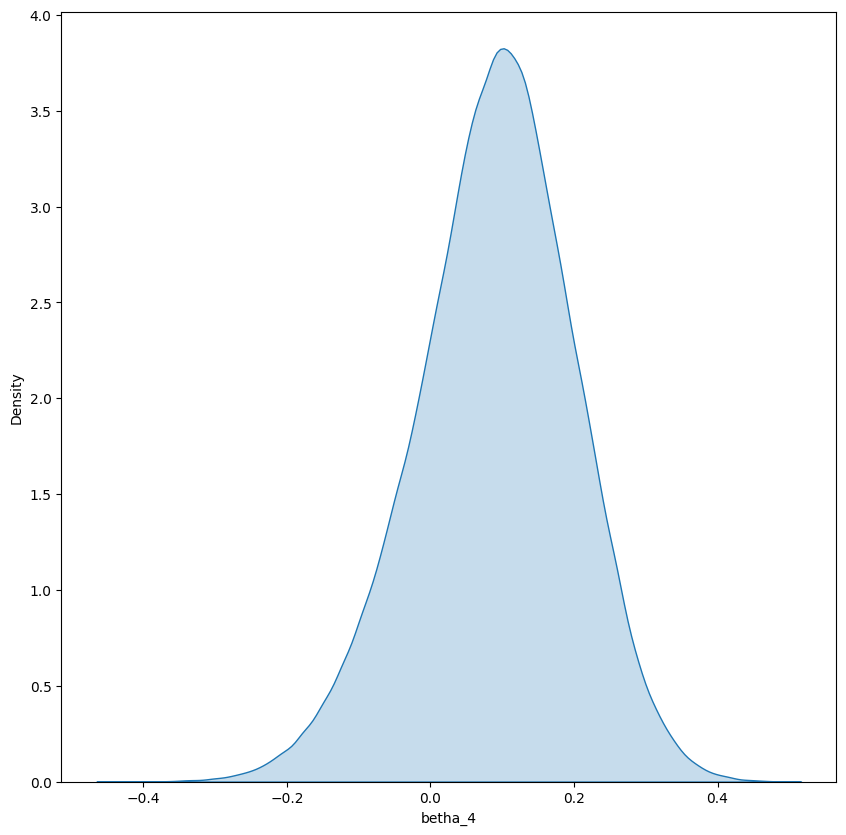

In [15]:
fig = plt.figure(figsize = (10 , 10 ))
sns.kdeplot( main_df['betha_4'] , label=f'betha_1'  , shade=True  )

In [16]:
main_df

,bias,betha_0,betha_1,betha_2,betha_3,betha_4,betha_5,R2,locate,class,alpha,flap,Error
0,2.085390,0.0,-0.915657,-0.028551,2.888235,0.109142,0.039640,0.988046,5,0.0,0.001,1.0,0.163911
1,2.126398,0.0,-0.780628,-0.212653,2.751687,0.065987,-0.170549,0.983762,5,0.0,0.001,1.0,-0.797636
2,2.073085,0.0,-0.813185,-0.045099,2.720254,0.020252,-0.038350,0.957171,5,0.0,0.001,1.0,1.625647
3,2.068925,0.0,-0.991820,-0.293427,3.077497,0.350788,-0.068416,0.977285,5,0.0,0.001,1.0,-0.528417
4,2.083132,0.0,-0.846536,-0.178068,2.782345,0.062920,-0.131796,0.987228,5,0.0,0.001,1.0,0.469350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235195,1.503118,0.0,-1.483946,-0.226701,3.117215,0.138249,-0.136664,0.975531,14,3.0,0.098,4.0,-0.325213
235196,1.476462,0.0,-1.088443,-0.021242,2.653989,0.115893,0.075977,0.987969,14,3.0,0.098,4.0,0.704909
235197,1.455194,0.0,-1.130570,-0.283127,2.737953,0.219741,-0.112765,0.976083,14,3.0,0.098,4.0,0.790295
235198,1.504200,0.0,-1.113942,-0.078336,2.691946,0.148071,0.005015,0.985952,14,3.0,0.098,4.0,-0.756543


In [25]:
main_df_2 = main_df[main_df['R2'] > 0.95 ]

In [26]:
main_df_2

,bias,betha_0,betha_1,betha_2,betha_3,betha_4,betha_5,R2,locate,class,alpha,flap,Error
0,2.085390,0.0,-0.915657,-0.028551,2.888235,0.109142,0.039640,0.988046,5,0.0,0.001,1.0,0.163911
1,2.126398,0.0,-0.780628,-0.212653,2.751687,0.065987,-0.170549,0.983762,5,0.0,0.001,1.0,-0.797636
2,2.073085,0.0,-0.813185,-0.045099,2.720254,0.020252,-0.038350,0.957171,5,0.0,0.001,1.0,1.625647
3,2.068925,0.0,-0.991820,-0.293427,3.077497,0.350788,-0.068416,0.977285,5,0.0,0.001,1.0,-0.528417
4,2.083132,0.0,-0.846536,-0.178068,2.782345,0.062920,-0.131796,0.987228,5,0.0,0.001,1.0,0.469350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235195,1.503118,0.0,-1.483946,-0.226701,3.117215,0.138249,-0.136664,0.975531,14,3.0,0.098,4.0,-0.325213
235196,1.476462,0.0,-1.088443,-0.021242,2.653989,0.115893,0.075977,0.987969,14,3.0,0.098,4.0,0.704909
235197,1.455194,0.0,-1.130570,-0.283127,2.737953,0.219741,-0.112765,0.976083,14,3.0,0.098,4.0,0.790295
235198,1.504200,0.0,-1.113942,-0.078336,2.691946,0.148071,0.005015,0.985952,14,3.0,0.098,4.0,-0.756543


In [29]:
df  = main_df_2.drop(['R2' , 'locate' , 'alpha' , 'flap' , 'Error'  ] , axis = 1 )

In [37]:
df

,bias,betha_0,betha_1,betha_2,betha_3,betha_4,betha_5,class
0,2.085390,0.0,-0.915657,-0.028551,2.888235,0.109142,0.039640,0.0
1,2.126398,0.0,-0.780628,-0.212653,2.751687,0.065987,-0.170549,0.0
2,2.073085,0.0,-0.813185,-0.045099,2.720254,0.020252,-0.038350,0.0
3,2.068925,0.0,-0.991820,-0.293427,3.077497,0.350788,-0.068416,0.0
4,2.083132,0.0,-0.846536,-0.178068,2.782345,0.062920,-0.131796,0.0
...,...,...,...,...,...,...,...,...
235195,1.503118,0.0,-1.483946,-0.226701,3.117215,0.138249,-0.136664,3.0
235196,1.476462,0.0,-1.088443,-0.021242,2.653989,0.115893,0.075977,3.0
235197,1.455194,0.0,-1.130570,-0.283127,2.737953,0.219741,-0.112765,3.0
235198,1.504200,0.0,-1.113942,-0.078336,2.691946,0.148071,0.005015,3.0


In [38]:
df_sample = df.sample(200000)

In [39]:
df_sample

,bias,betha_0,betha_1,betha_2,betha_3,betha_4,betha_5,class
97838,2.087812,0.0,-0.637440,-0.020351,2.603503,0.110304,0.071200,1.0
228198,2.092542,0.0,-0.917142,0.100459,2.895921,0.051144,0.145725,3.0
50184,1.660220,0.0,-1.067664,-0.114640,2.719496,0.022541,-0.104408,0.0
126685,1.688813,0.0,-1.049426,-0.118709,2.759487,0.143520,-0.041212,2.0
102007,2.077062,0.0,-0.878953,-0.062503,2.832891,0.089594,0.205352,1.0
...,...,...,...,...,...,...,...,...
196892,1.702994,0.0,-1.414485,-0.067191,3.177585,0.118782,0.013037,3.0
187791,1.464234,0.0,-1.209036,-0.241688,2.838527,0.277756,-0.063735,3.0
16849,2.087729,0.0,-0.827401,-0.149563,2.800723,0.108870,-0.083132,0.0
63051,1.665423,0.0,-0.923180,-0.167960,2.672830,0.237767,-0.028508,1.0


In [40]:
X , Y = df_sample.drop(['class'] , axis = 1 ) , df_sample['class']

In [41]:
X

,bias,betha_0,betha_1,betha_2,betha_3,betha_4,betha_5
97838,2.087812,0.0,-0.637440,-0.020351,2.603503,0.110304,0.071200
228198,2.092542,0.0,-0.917142,0.100459,2.895921,0.051144,0.145725
50184,1.660220,0.0,-1.067664,-0.114640,2.719496,0.022541,-0.104408
126685,1.688813,0.0,-1.049426,-0.118709,2.759487,0.143520,-0.041212
102007,2.077062,0.0,-0.878953,-0.062503,2.832891,0.089594,0.205352
...,...,...,...,...,...,...,...
196892,1.702994,0.0,-1.414485,-0.067191,3.177585,0.118782,0.013037
187791,1.464234,0.0,-1.209036,-0.241688,2.838527,0.277756,-0.063735
16849,2.087729,0.0,-0.827401,-0.149563,2.800723,0.108870,-0.083132
63051,1.665423,0.0,-0.923180,-0.167960,2.672830,0.237767,-0.028508


In [42]:
Y

,class
97838,1.0
228198,3.0
50184,0.0
126685,2.0
102007,1.0
...,...
196892,3.0
187791,3.0
16849,0.0
63051,1.0


In [51]:
x_u_train , x_u_test , y_u_train , y_u_test = train_test_split(X , Y , test_size = 0.3 , random_state=42 )

In [53]:
total_simulation = {
    'bias_correlation' : [] ,
    'betha_0_correlation' : [] ,
    'betha_1_correlation' : [] ,
    'betha_2_correlation' : [] ,
    'betha_3_correlation' : [] ,
    'betha_4_correlation' : [] ,
    'betha_5_correlation' : [] ,
    'alpha' : [] ,
    'flap'  : [] ,
    'accuracy_nav' : [] ,

    'accuracy_random_forest' : [] ,
    'n_estimators_RF' : [] ,
    'max_features_RF' : [] ,
    'max_depth_RF'    : [] ,
    'criterion_RF'    : [] ,

    'accuracy_extra_classifier' : [] ,
    'accuracy_svc_' : [] ,
    'C_svc'         : [] ,
    'kernel_svc'    : [] ,
    'gamma_svc'     : [] ,
    'ann'           : []


}

In [52]:
stander = StandardScaler()
x_u_train = pd.DataFrame(stander.fit_transform(x_u_train) , columns = x_u_train.columns )
x_u_test  = pd.DataFrame(stander.transform(x_u_test) , columns = x_u_test.columns )

In [54]:
obj_gaunb = GaussianNB()
obj_gaunb.fit(x_u_train , y_u_train )
pre_nb = obj_gaunb.predict(x_u_test)
accuray_nav = accuracy_score(pre_nb ,y_u_test )
print(classification_report(pre_nb ,y_u_test ) )
# plt.figure(figsize = (5 ,5 ))
# cm = confusion_matrix(pre_nb ,y_u_test , normalize='pred')
# disp = ConfusionMatrixDisplay(confusion_matrix=cm )
# disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
# plt.title("Nave Bays Confusion Matrix ")
# plt.show()
print(f"accuracy Nave Bays : {accuray_nav}")
total_simulation['accuracy_nav'].append(accuray_nav)


# ---------------------------------------------------------
rfc=RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid = param_grid,
                      cv = 3, n_jobs = -1, verbose = 2)
CV_rfc.fit(x_u_train, y_u_train)
best_params_for_random_forest = CV_rfc.best_params_
pre_random = CV_rfc.predict(x_u_test)
accuracy_random_forest = accuracy_score(pre_random ,y_u_test )
print(classification_report(pre_nb ,y_u_test ) )
# plt.figure(figsize = (5 , 5 ))
# cm = confusion_matrix(pre_random ,y_u_test , normalize='pred')
# disp = ConfusionMatrixDisplay(confusion_matrix=cm )
# disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
# plt.title("Random Forest Confusion Matrix ")
# plt.show()
print(f"accuracy accuracy_random_forest  : {accuracy_random_forest}")
total_simulation['accuracy_random_forest'].append(accuracy_random_forest)
total_simulation['n_estimators_RF'].append(best_params_for_random_forest['n_estimators'])
total_simulation['max_features_RF'].append(best_params_for_random_forest['max_features'])
total_simulation['max_depth_RF'].append(best_params_for_random_forest['max_depth'])
total_simulation['criterion_RF'].append(best_params_for_random_forest['criterion'])


# ---------------------------------------------------------
extra_classifier = ExtraTreesClassifier()
extra_classifier.fit(x_u_train , y_u_train )
predict_extra = extra_classifier.predict(x_u_test)
total_simulation['accuracy_extra_classifier'].append(accuracy_score(predict_extra ,y_u_test ) )

# --------------------------------------------------------
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
grid.fit(x_u_train, y_u_train)
best_params_for_svc = grid.best_params_
model_svc = SVC()
svc_predict = grid.predict(x_u_test)
accuracy_svc = accuracy_score(svc_predict ,y_u_test )
# plt.figure(figsize = (5 , 5 ))
# cm = confusion_matrix(svc_predict ,y_u_test, normalize='pred')
# disp = ConfusionMatrixDisplay(confusion_matrix=cm )
# disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
# plt.title("SVM(SVC) Confusion Matrix ")
# plt.show()
total_simulation['accuracy_svc_'].append(accuracy_svc)
total_simulation['C_svc'].append(best_params_for_svc['C'])
total_simulation['kernel_svc'].append(best_params_for_svc['kernel'])
total_simulation['gamma_svc'].append(best_params_for_svc['gamma'])


# ----------------------------------------------------------







new_y_u_train_cat = to_categorical(y_u_train , 4 )
new_y_u_test_cat  = to_categorical(y_u_test , 4 )

model_learning = Sequential([
    Dense(32 , activation='relu' , input_shape = x_u_train.shape[1 : ] ) ,
    Dropout(0.2) ,
    Dense(10 , activation= 'relu' ) ,
    Dense(4 , activation='softmax' ) ,
])

model_learning.compile('adam' , loss = 'categorical_crossentropy' , metrics = ['acc' ] )
model_learning_info = model_learning.fit(x_u_train , new_y_u_train_cat , epochs = 50 , validation_data = [x_u_test , new_y_u_test_cat ] )
plt.plot(range(50) , model_learning_info.history['acc'] , label='acc' )
plt.plot(range(50) , model_learning_info.history['val_acc'] , label='val_acc' )
plt.legend()
plt.grid()
plt.show()


              precision    recall  f1-score   support

         0.0       0.38      0.29      0.33     19891
         1.0       0.36      0.32      0.34     17100
         2.0       0.42      0.33      0.37     18856
         3.0       0.11      0.39      0.17      4153

    accuracy                           0.32     60000
   macro avg       0.32      0.33      0.30     60000
weighted avg       0.37      0.32      0.33     60000

accuracy Nave Bays : 0.3153666666666667
Fitting 3 folds for each of 60 candidates, totalling 180 fits


KeyboardInterrupt: 